- For this task there are two files `credit_record.csv` and `application_record.csv` where bank clients are related by the `ID` column.
- In `application_record.csv` we have the following variables

| Feature Name         | Explanation     | Additional Remarks |
|--------------|-----------|-----------|
| ID | Randomly allocated client number      |         |
| AMT_INCOME_TOTAL   | Annual income  |  |
| NAME_INCOME_TYPE   | Income Source |  |
| NAME_EDUCATION_TYPE   | Level of Education  |  |
| CODE_GENDER   | Applicant's Gender   |  |
| FLAG_OWN_CAR | Car Ownership |  | 
| CNT_CHILDREN | Number of Children | |
| FLAG_OWN_REALTY | Real Estate Ownership | | 
| NAME_FAMILY_STATUS | Relationship Status | | 
| NAME_HOUSING_TYPE | Housing Type | | 
| DAYS_BIRTH | No. of Days | Count backwards from current day (0), -1 means yesterday
| DAYS_EMPLOYED | No. of Days | Count backwards from current day(0). If positive, it means the person is currently unemployed.
| FLAG_MOBIL | Mobile Phone Ownership | | 
| FLAG_WORK_PHONE | Work Phone Ownership | | 
| FLAG_PHONE | Landline Phone Ownership | | 
| FLAG_EMAIL | Landline Phone Ownership | | 
| OCCUPATION_TYPE | Occupation | | 
| CNT_FAM_MEMBERS | Count of Family Members | |



- In `credit_record.csv` we have the following variables


| Feature Name         | Explanation     | Additional Remarks |
|--------------|-----------|-----------|
| ID | Randomly allocated client number | |
| MONTHS_BALANCE | Number of months in the past from now when STATUS is measured | 0 = current month, -1 = last month, -2 = two months ago, etc.|
| STATUS | Number of days a payment is past due | 0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month |

In [22]:
import pandas as pd
import numpy as np

In [2]:
df_credit = pd.read_csv('/Users/aadharbaheti/Downloads/Assignment2/data/credit_record.csv')

In [3]:
df_application = pd.read_csv('/Users/aadharbaheti/Downloads/Assignment2/data/application_record.csv')

In [4]:
print(df_application.shape)

print(df_credit.shape)


print(f'the number of unique clients in application record are {df_application["ID"].nunique()}')

print(f'the number of unique bank clients in credit record are {df_credit["ID"].nunique()}')

(438557, 18)
(1048575, 3)
the number of unique clients in application record are 438510
the number of unique bank clients in credit record are 45985


In [5]:
df= pd.merge(df_application,df_credit,on ='ID',how ='inner')

(df.shape)

(df["ID"].nunique())

36457

Changing the values of STATUS in df according to the following mapping: 
{C, X, 0} -> 0 and {1, 2, 3, 4, 5} -> 1 


In [6]:
df['STATUS'] = df['STATUS'].replace(['C', 'X', '0'],[0,0,0]).replace(['1','2','3','4','5'],[1,1,1,1,1])

Creating a New numpy array named list_of_defaults for clients with default


Further Creating df final consisting of ID's with default with y=1

In [7]:
df2 = df.loc[(df['MONTHS_BALANCE']> -12)  & (df['STATUS']==1)]
df2 = df2.drop_duplicates(subset='ID', keep='first')
list_of_defaults = df2['ID'].to_numpy()


In [8]:
df_final = df2[df2["ID"].isin(list_of_defaults)]


df_final = df_final.assign(y=1)

In [9]:
print(df_final.shape)

(1740, 21)


Desired Shape is (4000,21) Therefore increasing df final with unique ID's


In [10]:
df3 = df[~df['ID'].isin(df_final['ID'])]
df3 = df3.drop_duplicates(subset='ID', keep='first').head(4000-len((list_of_defaults)))
df_final = df_final.append(df3, ignore_index=True)
df_final = df_final.drop_duplicates(subset='ID', keep='first')

/var/folders/n7/nx2jtvtx6mv45smlrw1sk3s00000gn/T/ipykernel_9552/963283679.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append(df3, ignore_index=True)


In [11]:
print(df_final.shape)

(4000, 21)


In [12]:
overdue_29 = df_final[df_final['STATUS'] > 0].shape[0]
print("Number of clients with overdue payments of more than 29 days:", overdue_29)

overdue_less_29 = df_final[df_final['STATUS'] <= 0].shape[0]
print("Number of clients with overdue payments of less than 29 days:", overdue_less_29)

Number of clients with overdue payments of more than 29 days: 1743
Number of clients with overdue payments of less than 29 days: 2257


In [13]:
missing_values = df_final.isna().sum()
print("Missing Values in df_final:")
print(missing_values) ## Check for Na's

Missing Values in df_final:
ID                        0
CODE_GENDER               0
FLAG_OWN_CAR              0
FLAG_OWN_REALTY           0
CNT_CHILDREN             74
AMT_INCOME_TOTAL          0
NAME_INCOME_TYPE          0
NAME_EDUCATION_TYPE    1831
NAME_FAMILY_STATUS        0
NAME_HOUSING_TYPE         0
DAYS_BIRTH                0
DAYS_EMPLOYED             0
FLAG_MOBIL                0
FLAG_WORK_PHONE           0
FLAG_PHONE                0
FLAG_EMAIL                0
OCCUPATION_TYPE        1166
CNT_FAM_MEMBERS           0
MONTHS_BALANCE            0
STATUS                    0
y                      2260
dtype: int64


In [14]:
df_final['y'] = df_final['y'].fillna(0) # Filling y=0 for non default
df_final = df_final.drop(['STATUS', 'MONTHS_BALANCE'], axis=1)

In [15]:
df_final = df_final.drop(['ID'], axis=1)

IMPUTING MISSING VALUES ACCORDING TO VARIABLES

In [16]:
nominal = ['NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE']

for i in nominal:
    df_final[i].fillna(df_final[i].mode()[0], inplace = True)
    

numeric = ['CNT_CHILDREN']

for i in numeric:
    df_final[i].fillna(df_final[i].mean(axis = 0), inplace = True)


df_final.isnull().sum() ##Checking for Na's again

CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
y                      0
dtype: int64

 Converting the values in `NAME_EDUCATION_TYPE` as follows
- Lower secondary -> 1
- Secondary / secondary special -> 2
- Incomplete higher -> 3
- Higher education -> 4



In [18]:
df_final['NAME_EDUCATION_TYPE'].replace(['Lower secondary','Secondary / secondary special','Incomplete higher','Higher education'],[1,2,3,4],inplace=True)


Adding dummy variables to `df_final` for all of the nominal features which are currently stored as string

In [19]:
df_final = pd.get_dummies(df_final, prefix='', prefix_sep='', 
                            columns=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'])

In [20]:
df_final = df_final.drop(['F','N','N','Commercial associate','Civil marriage','Co-op apartment','Accountants'], axis=1)

- Creating a numpy array named `y` from the `y` column of `df_final` making sure that the values of the array `y` are stored as integers (3 marks)   
- Creating a numpy array named `X`  from all the remaining features in `df_final`

In [23]:
df_final['y'] = df_final['y'].astype(np.int64)

y = np.array(df_final['y'].values)


df_temp = df_final.drop('y', axis=1)
X = np.array(df_temp.values)

Splitting our data into train(70%) and test(30%)

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 7, stratify = y)


from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)

X_train_scaled = sc.transform(X_train)

X_test_scaled = sc.transform(X_test)

Training Support Vector Classifier (kernel>>linear) on standardised data

In [30]:
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear', random_state=7)

svm_linear.fit(X_train_scaled, y_train)



from sklearn.metrics import accuracy_score

accuracy_train = svm_linear.score(X_train_scaled, y_train)

accuracy_test = svm_linear.score(X_test_scaled, y_test)


print("Accuracy of Training dataset :", accuracy_train)

print("Accuracy of Test dataset :", accuracy_test)

Accuracy of Training dataset : 0.6571428571428571
Accuracy of Test dataset : 0.6483333333333333


Training Support Vector Classifier (kernel>>rbf) on standardised data


In [31]:
from sklearn.svm import SVC

svm_rbf = SVC(kernel='rbf', random_state=7)

svm_rbf.fit(X_train_scaled, y_train)



from sklearn.metrics import accuracy_score

accuracy_train = svm_rbf.score(X_train_scaled, y_train)

accuracy_test = svm_rbf.score(X_test_scaled, y_test)

print("Accuracy of Training dataset :", accuracy_train)

print("Accuracy of Test dataset :", accuracy_test)

Accuracy of Training dataset : 0.7810714285714285
Accuracy of Test dataset : 0.7275


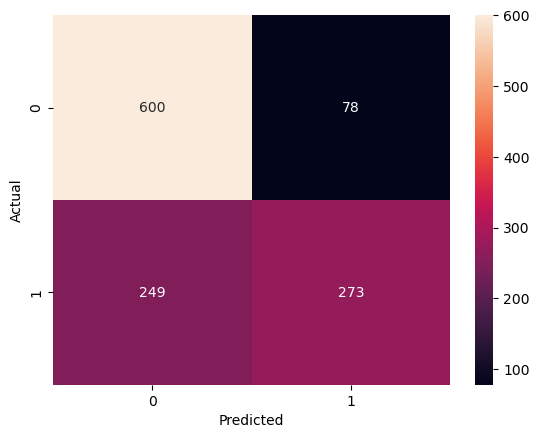

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = svm_rbf.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
